### 本程序针对《毕业论文》第四章 SACOL站微波辐射计模拟亮温和观测亮温对比编写
主要解决第二小节不同频率亮温的日变化特征对比

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [38]:
filepath = r'I:\Data\Personal Data\graduation project\SACOL\microwave\2009\200901\2009-01-15_18-01-28_lv1.csv'
mircowave_lv1_data = pd.read_csv(filepath,index_col='Record')
mircowave_lv1_data.head(6)

,Date/Time,10,Tamb(K),Rh(%),Pres(mb),Tir(K),Rain,Azim,Elev,TkBB(K),...,26.235,30.000,51.250,52.280,53.850,54.940,56.660,57.290,58.800,Unnamed: 23
Record,,,,,,,,,,,,,,,,,,,,,
1,01/15/09 18:03:17,11,273.21,20.76,793.7,261.5,N,0.0,90.0,285.32,...,6.66,7.05,70.76,103.25,208.70,262.59,271.77,272.38,272.30,NaN
2,01/15/09 18:04:19,11,273.17,20.99,793.7,259.5,N,0.0,90.0,285.27,...,6.27,7.55,72.64,103.74,208.51,262.56,271.41,272.57,272.89,NaN
3,01/15/09 18:05:19,11,273.29,20.94,793.6,259.4,N,0.0,90.0,285.23,...,6.18,7.85,71.37,103.59,209.14,261.97,272.17,272.21,272.65,NaN
4,01/15/09 18:06:19,11,273.14,20.89,793.7,260.7,N,0.0,90.0,285.19,...,6.39,7.28,71.59,104.12,208.48,262.30,271.84,271.99,272.22,NaN
5,01/15/09 18:07:19,11,273.04,21.10,793.7,259.1,N,0.0,90.0,285.15,...,6.09,7.70,69.30,102.54,208.84,261.89,271.89,272.17,272.68,NaN
6,01/15/09 18:08:19,11,273.08,21.15,793.6,258.9,N,0.0,90.0,285.11,...,6.13,7.41,70.89,102.55,208.42,262.09,271.48,272.61,272.66,NaN


In [35]:
mircowave_lv1_data.columns

Index(['Date/Time', ' 22.235', ' 23.035', ' 23.835', ' 26.235', ' 30.000',
       ' 51.250', ' 52.280', ' 53.850', ' 54.940', ' 56.660', ' 57.290',
       ' 58.800', 'Unnamed: 23'],
      dtype='object')

In [70]:
Del_columns = mircowave_lv1_data.columns[1:10]
mircowave_lv1_data.drop(Del_columns,axis=1,inplace=True)
Del_columns = mircowave_lv1_data.columns[-1]
mircowave_lv1_data.drop(Del_columns,axis=1,inplace=True)
mircowave_lv1_data.head(6)

,Date/Time,22.235,23.035,23.835,26.235,30.000,51.250,52.280,53.850,54.940,56.660,57.290,58.800
Record,,,,,,,,,,,,,
1,01/15/09 18:03:17,7.89,6.55,6.22,6.66,7.05,70.76,103.25,208.70,262.59,271.77,272.38,272.30
2,01/15/09 18:04:19,5.70,6.76,5.93,6.27,7.55,72.64,103.74,208.51,262.56,271.41,272.57,272.89
3,01/15/09 18:05:19,7.82,6.29,6.74,6.18,7.85,71.37,103.59,209.14,261.97,272.17,272.21,272.65
4,01/15/09 18:06:19,7.16,6.97,6.01,6.39,7.28,71.59,104.12,208.48,262.30,271.84,271.99,272.22
5,01/15/09 18:07:19,7.75,6.24,6.10,6.09,7.70,69.30,102.54,208.84,261.89,271.89,272.17,272.68
6,01/15/09 18:08:19,8.16,6.61,6.50,6.13,7.41,70.89,102.55,208.42,262.09,271.48,272.61,272.66


In [94]:
def draw_Linechart_photo(data,photoname):
    plt.rcParams['figure.figsize'] = (10.0,20.0)
    #纵轴上分布高度数值
    Height = data.index.values[1:13]
    # 绘图
    Len = len(data['Date/Time'])
    print('The len is ' + str(Len))
    i = 0
    while i<Len:
        data_for_print = np.array(data.iloc[i:i+1,1:13]).T
        plt.plot(data_for_print, Height, label=data['Date/Time'][i:i+1].values)
        i = i+1
    #设置X轴
    x_ticks = np.linspace(180, 320, 8)
    plt.xticks(x_ticks,rotation=45)
    plt.xlabel("Fahrenheit K")
    plt.ylabel("Altitude km")
    # 启动图例
    plt.legend()
    # 添加网格
    plt.grid()
    # 主标题
    plt.title(photoname,fontsize=20,fontweight='bold')
    # 保存图片
    photopath = 'G:/python/Graduation design/photo/' + photoname + '.png'
    # plt.savefig(photopath,bbox_inches = 'tight')
    # 展示图片
    plt.show()

In [164]:
mircowave_lv1_data.iloc[0,0][9:17]

'18:03:17'

([<matplotlib.axis.XTick at 0x23e02b340a0>,
 [Text(0, 0, '18:03:17'),
  Text(50, 0, '18:53:19'),
  Text(100, 0, '19:43:18'),
  Text(150, 0, '20:33:19'),
  Text(200, 0, '21:23:19'),
  Text(250, 0, '22:13:19'),
  Text(300, 0, '23:03:19'),
  Text(350, 0, '23:53:19')])

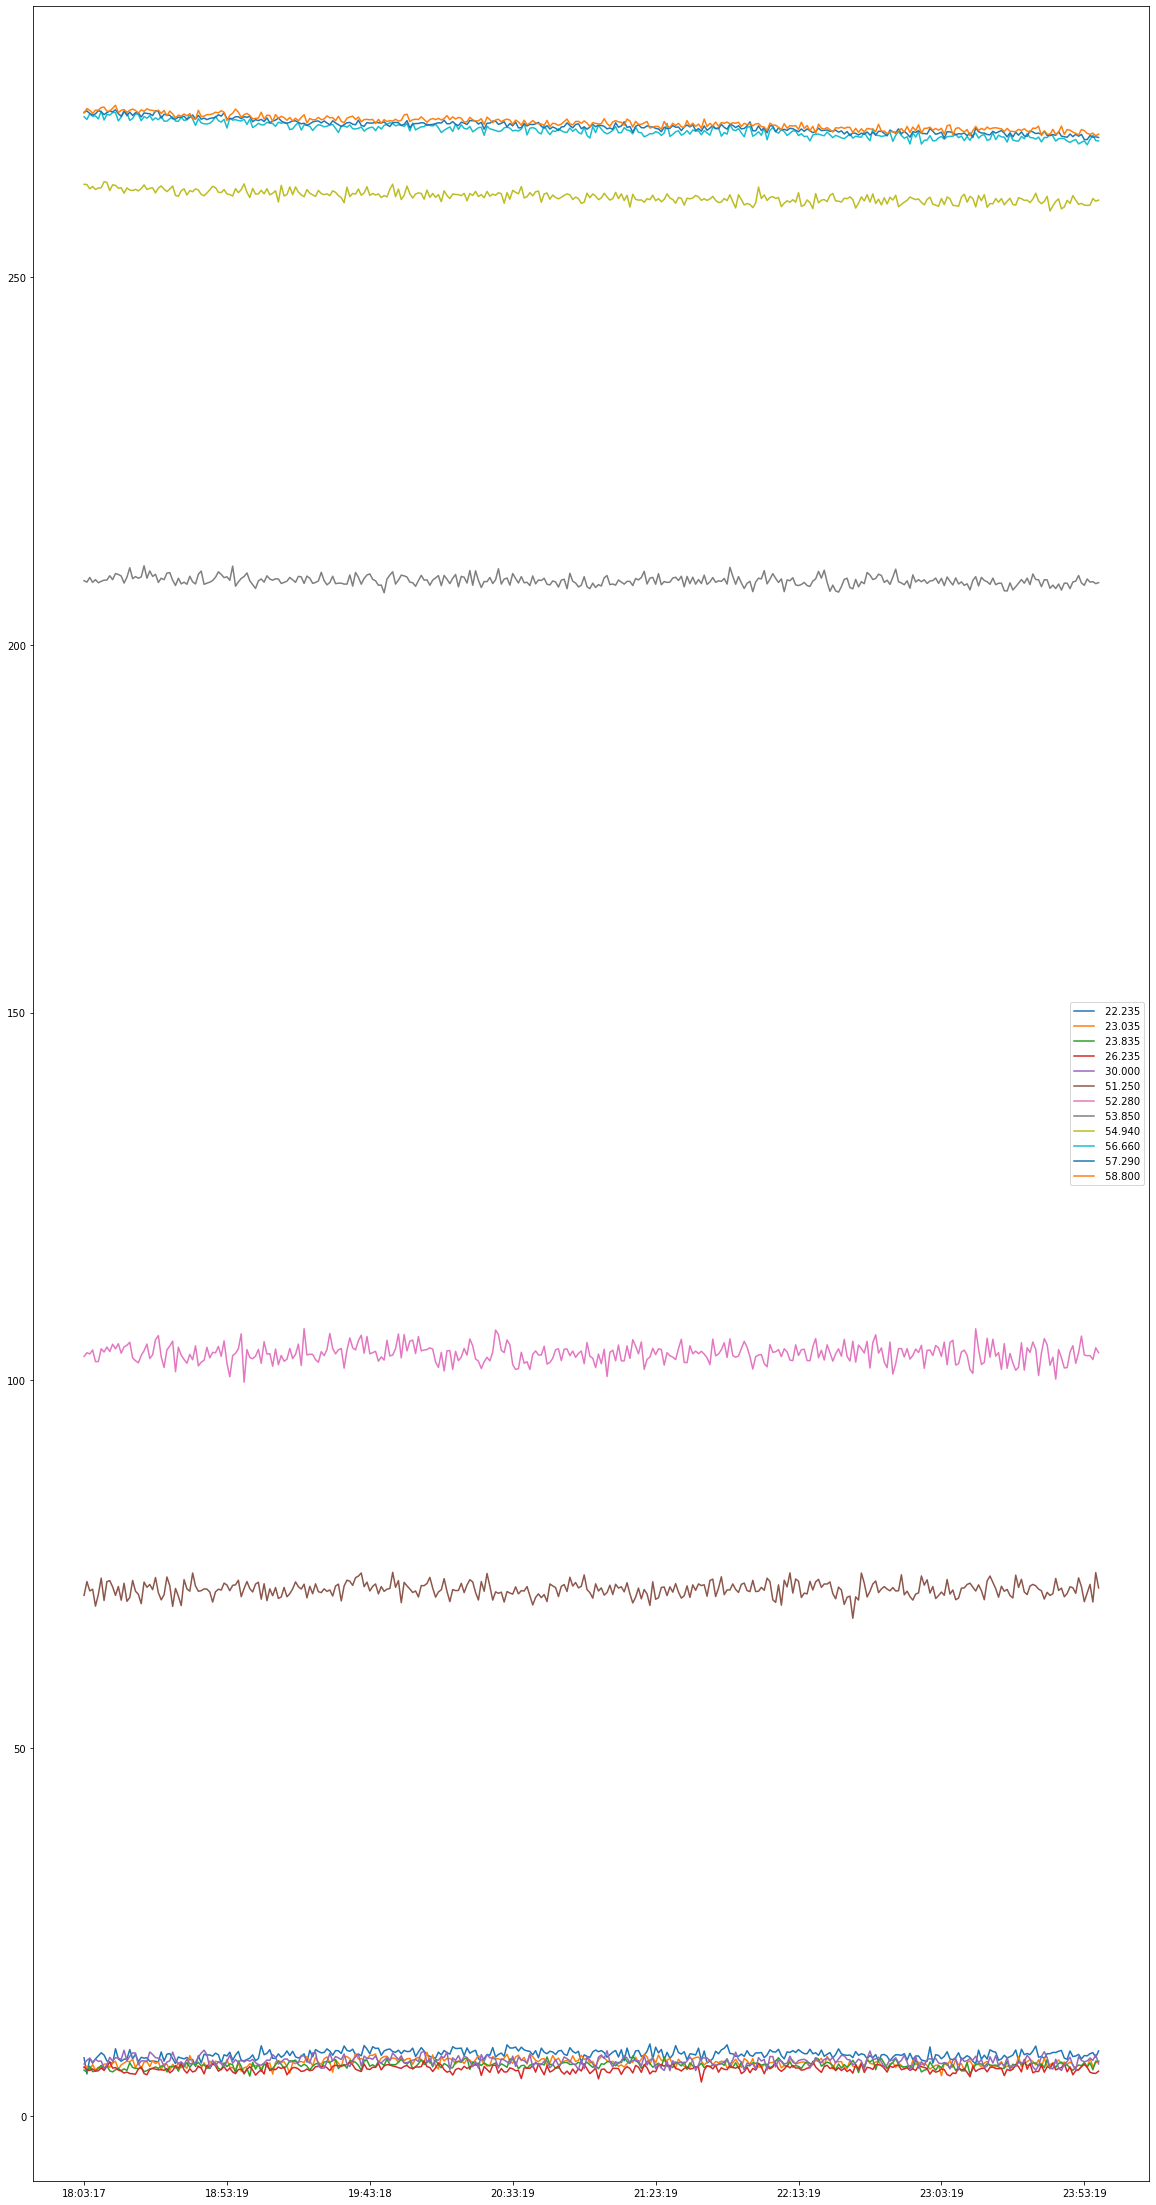

In [166]:
plt.rcParams['figure.figsize'] = (20.0,40.0)
for fre in range(len(mircowave_lv1_data.columns)-1):
    data_for_print = np.array(mircowave_lv1_data.iloc[:,fre+1]).T
    plt.plot(data_for_print,label=mircowave_lv1_data.columns[fre+1])
# 启动图例
plt.legend()
# 设置x轴刻度
ara = np.arange(0,len(mircowave_lv1_data.index),50)
x_ticks = []
for i in range(len(ara)):
        x_ticks.append(mircowave_lv1_data.iloc[ara[i],0][9:17])
plt.xticks(ara,x_ticks)